# Modeling and Evaluation

### Answer business requirement 2:

* The client is seeking an ML system capable of accurately predicting whether a cherry leaf is healthy or affected by powdery mildew.

## Inputs

* inputs/cherryleaves_database/cherry-leaves/train
* inputs/cherryleaves_database/cherry-leaves/validation
* inputs/cherryleaves_database/cherry-leaves/test
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Save model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file 

## Additional Comments

* Outputs align with client requirements
* Image augmentation enhances model robustness
* Class indices aid prediction interpretation
* Comprehensive approach drives meaningful outcomes


---

# Set Data Directory

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/my-fifth-project/jupyter_notebooks'

In [3]:
os.chdir('/workspace/my-fifth-project')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/my-fifth-project'

### Set input directories

* Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/cherryleaves_database/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Set output directory

In [6]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


### Set labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


### Set image shape

In [8]:
import joblib
version = 'v2'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




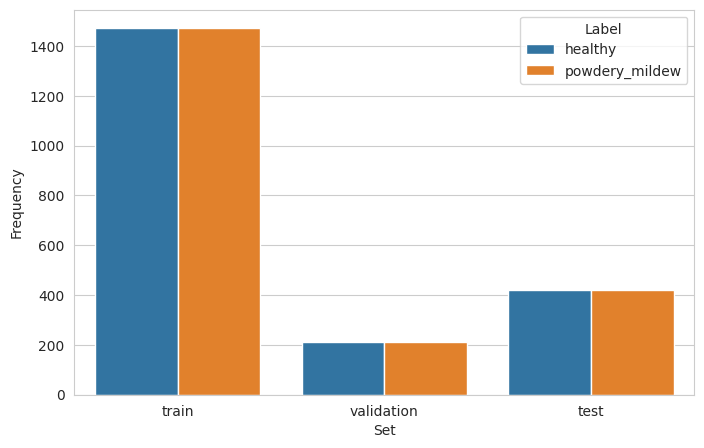

In [9]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

### Pie chart for dataset distribution

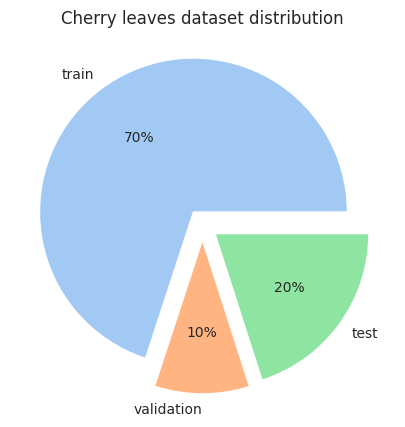

In [10]:
plt.figure(figsize=(8,5))
set_labels = df_freq['Set'].unique()
colors = sns.color_palette('pastel')[:len(set_labels)]
explode = [0.1] * len(set_labels)

set_frequencies = []
for set_label in set_labels:
    set_frequencies.append(df_freq[df_freq['Set'] == set_label]['Frequency'].sum())

plt.pie(set_frequencies, labels=set_labels, colors=colors, explode=explode, autopct='%.0f%%')
plt.title('Cherry leaves dataset distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

### ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Intiatize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

### Augment training image dataset

In [13]:
batch_size = 16
train_set = augmented_image_data.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True
                                              )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment validation image dataset

In [14]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                          target_size=image_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=batch_size,
                                                          class_mode='categorical',
                                                          shuffle=False
                                                          )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Augment test image dataset

In [15]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### Plot augmented training image

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


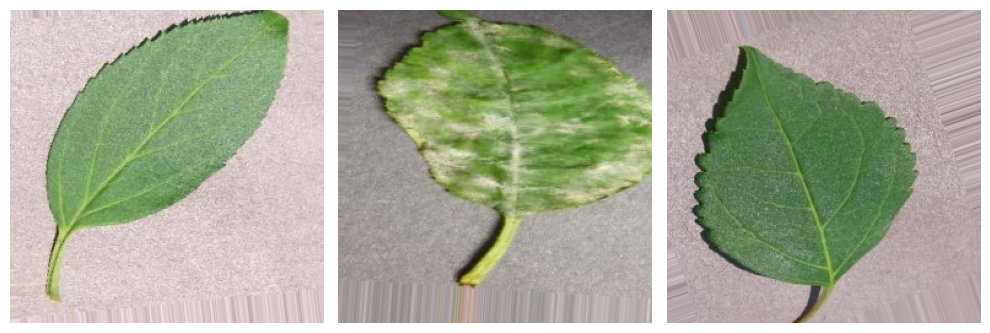

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = train_set.next()
    print(img.shape)
    axes[i].imshow(img[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Plot augmented validation images

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


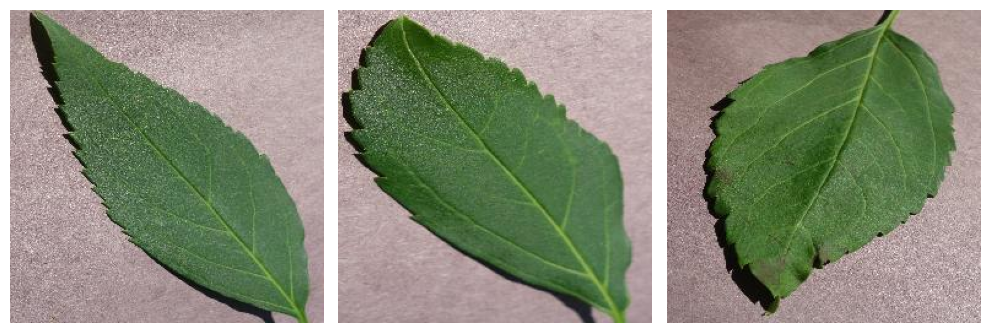

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = validation_set.next()
    print(img.shape)
    axes[i].imshow(img[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Plot augmented test images

(16, 256, 256, 3)
(16, 256, 256, 3)
(16, 256, 256, 3)


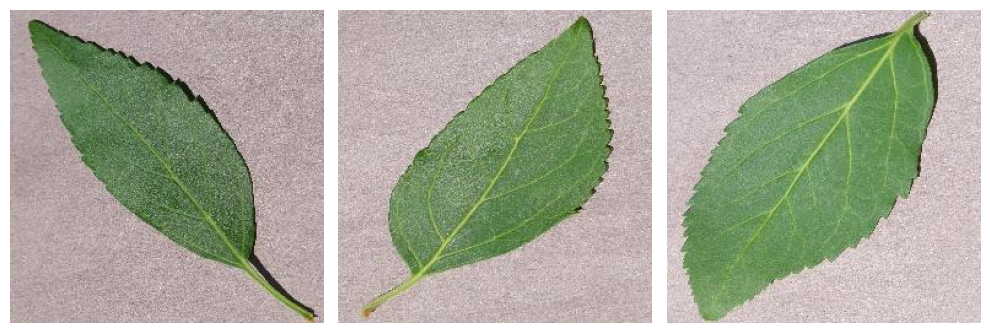

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i in range(3):
    img, label = test_set.next()
    print(img.shape)
    axes[i].imshow(img[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Save class_indices

In [342]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

# Model creation

### Install & Import Keras Tuner for hyperparameter optimisation

In [344]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00a 0:00:01


In [19]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

### ML model

* Import model packages

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad, SGD
from tensorflow.keras import regularizers

* Model

In [22]:
def create_tf_model(hp):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    hp_units = hp.Int('units', min_value=64, max_value=128, step=32)
    model.add(Dense(units=hp_units, activation = 'relu'))

    model.add(Dropout(0.4))    
    model.add(Dense(2, activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    return model

* Hyperparameter Tuning with Hyperband Algorithm

In [353]:
tuner = kt.Hyperband(create_tf_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory=file_path,
                     project_name='hypertuning')

Reloading Tuner from outputs/v2/hypertuning/tuner0.json


* Early Stopping

In [354]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

* Hyperparameter search

In [355]:
tuner.search(train_set,
          epochs=25,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 6 Complete [00h 07m 51s]
val_accuracy: 0.9976190328598022

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 35m 12s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.0001.



* Create model using defined best hyperparameters

In [356]:
model = tuner.hypermodel.build(best_hps)

* Model Summary

In [357]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 128)     36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

* Re-instantiate the hypermodel with best hyperparameters.

In [358]:
model = tuner.hypermodel.build(best_hps)

model.fit(train_set,
          epochs=30,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/30
184/184 [==============================] - 247s 1s/step - loss: 0.4601 - accuracy: 0.7588 - val_loss: 0.0900 - val_accuracy: 0.9881
Epoch 2/30
184/184 [==============================] - 240s 1s/step - loss: 0.1318 - accuracy: 0.9691 - val_loss: 0.0295 - val_accuracy: 0.9952
Epoch 3/30
184/184 [==============================] - 241s 1s/step - loss: 0.0676 - accuracy: 0.9864 - val_loss: 0.0172 - val_accuracy: 0.9929
Epoch 4/30
184/184 [==============================] - 241s 1s/step - loss: 0.0386 - accuracy: 0.9905 - val_loss: 0.0125 - val_accuracy: 0.9929
Epoch 5/30
184/184 [==============================] - 242s 1s/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0527 - val_accuracy: 0.9762
Epoch 6/30
184/184 [==============================] - 241s 1s/step - loss: 0.0203 - accuracy: 0.9956 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/30
184/184 [==============================] - 241s 1s/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 2.4312e-04 - val_accuracy: 1.

* Save the model.

In [359]:
model.save('outputs/v2/powdery_mildew_detection_model.h5')

# Model Performace

### Model learning curve

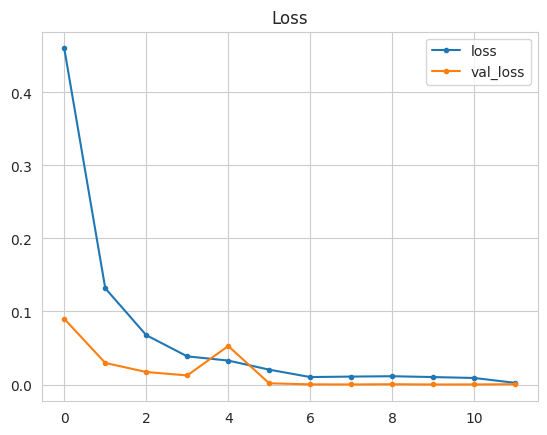

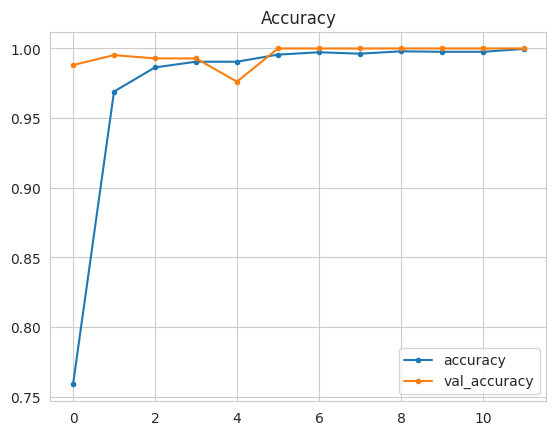

In [360]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

# Model Evaluation

* Load saved model.

In [80]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_detector_model_softmaxSGD+.h5')

* Evaluate model on test set.

In [81]:
evaluation = model.evaluate(test_set)
print("Model accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ",evaluation[0])

53/53 [==============================] - 15s 271ms/step - loss: 0.0103 - accuracy: 0.9988
Model accuracy: 99.88%
Model Loss:  0.010254933498799801


* Save evaluation pickle

In [50]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

* Confusion Matrix

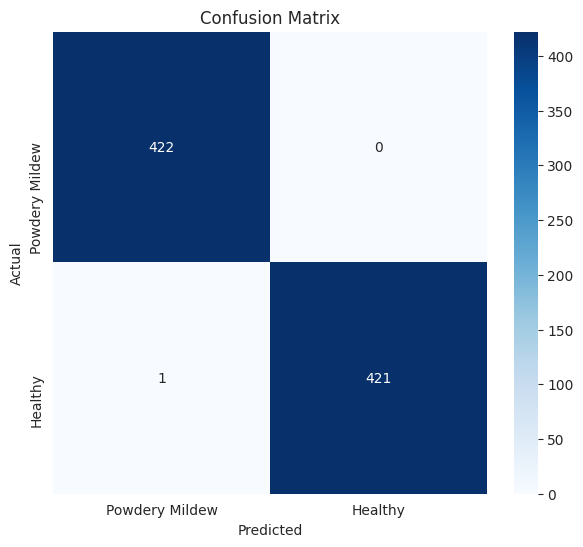

In [82]:
from sklearn.metrics import confusion_matrix

pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)

cm = confusion_matrix(test_set.classes, y_pred)

target_names = ['Powdery Mildew', 'Healthy']

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names,
            ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)

* Classification Report - A

In [83]:
from sklearn.metrics import classification_report

print('Classification Report:\n----------------------\n')
print(classification_report(test_set.classes, y_pred, 
      target_names=target_names))

Classification Report:
----------------------

                precision    recall  f1-score   support

Powdery Mildew       1.00      1.00      1.00       422
       Healthy       1.00      1.00      1.00       422

      accuracy                           1.00       844
     macro avg       1.00      1.00      1.00       844
  weighted avg       1.00      1.00      1.00       844



* Test prediction using a random image

Image shape: (256, 256), Image mode: RGB


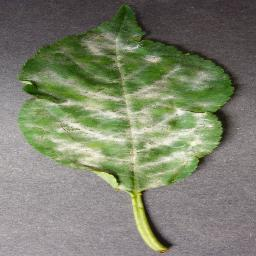

In [90]:
import random
from tensorflow.keras.preprocessing import image

pointer = 50
label = labels[1] # select Healthy [0] or Infected [1]

image_files = os.listdir(test_path + '/' + label)

random_image_file = random.choice(image_files)

pil_image = image.load_img(test_path + '/'+ label + '/'+ random_image_file,
                          target_size=image_shape, color_mode='rgb')

print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Convert image to array and prepare for prediction.

In [91]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


* Predict class probabilities.

In [92]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

pred_percentage = round(pred_proba * 100, 2)

print(f"Label: {pred_class}")
print(f"Percentage: {pred_percentage}%")

Label: healthy
Percentage: 100.0%


### Fit model for model training

In [291]:
model = create_tf_model()
model.fit(train_set,
          epochs=30,
          steps_per_epoch = len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/30
210/210 [==============================] - 318s 2s/step - loss: 0.5883 - accuracy: 0.6710 - val_loss: 0.3573 - val_accuracy: 0.8952
Epoch 2/30
210/210 [==============================] - 320s 2s/step - loss: 0.2890 - accuracy: 0.8843 - val_loss: 0.1005 - val_accuracy: 0.9452
Epoch 3/30
210/210 [==============================] - 324s 2s/step - loss: 0.1843 - accuracy: 0.9365 - val_loss: 0.0619 - val_accuracy: 0.9786
Epoch 4/30
210/210 [==============================] - 336s 2s/step - loss: 0.1337 - accuracy: 0.9560 - val_loss: 0.0311 - val_accuracy: 0.9881
Epoch 5/30
210/210 [==============================] - 339s 2s/step - loss: 0.1306 - accuracy: 0.9580 - val_loss: 0.0302 - val_accuracy: 0.9952
Epoch 6/30
210/210 [==============================] - 337s 2s/step - loss: 0.0965 - accuracy: 0.9679 - val_loss: 0.0228 - val_accuracy: 0.9929
Epoch 7/30
210/210 [==============================] - 339s 2s/step - loss: 0.0810 - accuracy: 0.9707 - val_loss: 0.0178 - val_accuracy: 0.9929

### Save model

In [292]:
model.save('outputs/v1/powdery_mildew_detector_model_softmaxSGD++).h5')

---

# Model Performace

### Model learning curve

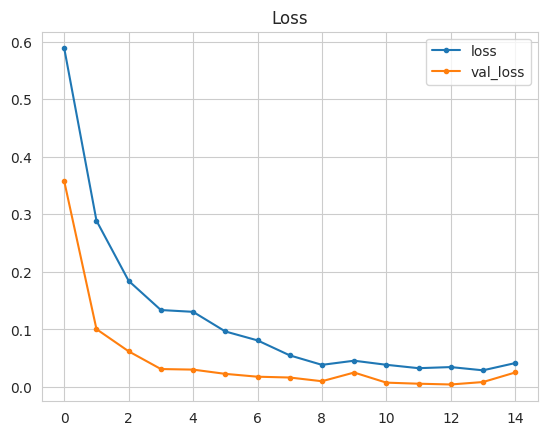

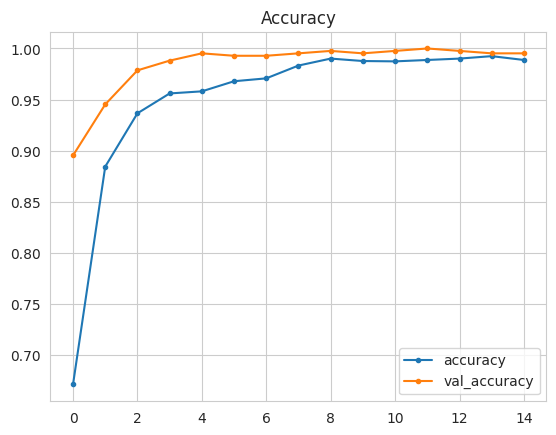

In [293]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

### Model Evaluation

* Import packages

In [294]:
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

* Load saved model.

In [298]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_detector_model_softmaxSGD++.h5')

* Evaluate model on test set.

In [299]:
evaluation = model.evaluate(test_set)

61/61 [==============================] - 25s 408ms/step - loss: 0.0189 - accuracy: 0.9964


* Set accuracy variables.

In [300]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

* Confusion matrix.

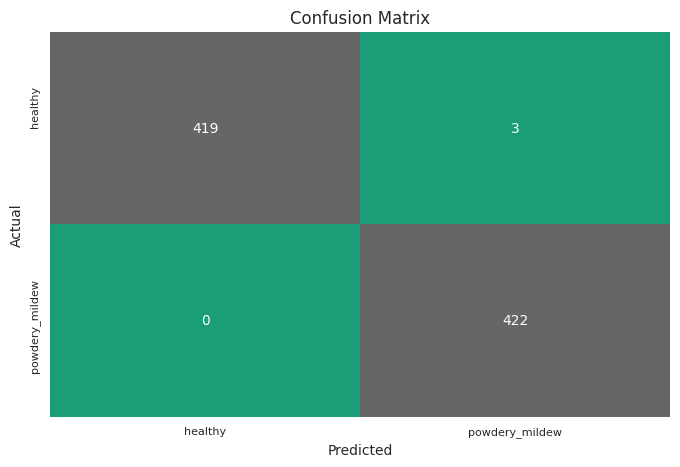

In [301]:
cm = confusion_matrix(y_true,y_pred)

classes=list(test_set.class_indices.keys()) 
length=len(classes)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Dark2', cbar=False)       
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(f'{file_path}/confusion_matrix.png',
            bbox_inches='tight', dpi=150)
plt.show()

* Classification report.

In [302]:
print('Classification Report:\n----------------------\n')
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:
----------------------

                precision    recall  f1-score   support

       healthy       1.00      0.99      1.00       422
powdery_mildew       0.99      1.00      1.00       422

      accuracy                           1.00       844
     macro avg       1.00      1.00      1.00       844
  weighted avg       1.00      1.00      1.00       844



* Save evaluation pickle.

In [303]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Predict on new data

* Load a random image as PIL.

Image shape: (256, 256), Image mode: RGB


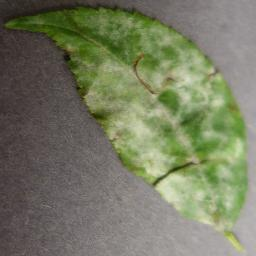

In [322]:
from tensorflow.keras.preprocessing import image

pointer = 24
label = labels[1] # select Healthy [0] or Infected [1]

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Convert image to array and prepare for prediction.

In [323]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)
print(my_image.shape)

(1, 256, 256, 3)


* Predict class probabilities.

In [324]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba < 0.5]

if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

print(f"{pred_class} {round(pred_proba*100, 2)}%")

powdery_mildew 100.0%
